# Survival Analysis, Pt 1
- Survival analysis is used to find out the time it takes for an event of interest to occur.
- In cancer studies, most survival analyses use the following methods:
    - (1) Kaplan-Meier plots: visualizes survival curves.
    - (2) Nelson-Aalen plots: visualizes cumulative hazard.
    - (3) Log-rank tests: compares the survival curves of two or more groups
    - (4) Cox proportional hazards regression: finds the effect of different variables on survival.

## Cancer studies - event types
- Survival Time: an amount of time until a subject is alive or actively participates in a survey.
- Three event types:
    - Relapse: a deterioration in someone’s state of health after a temporary improvement.
    - Progression: the process of developing or moving gradually towards a more advanced state. (Improvement in health.)
    - Death: the destruction or permanent end of something.

## Censoring
- There is a possibility that an event may not be observed for various reasons. These are known as censored observations. Censoring may arise in the following ways:
    - A patient has not (yet) experienced the event of interest (death or relapse in our case) within the study period.
    - A patient is not followed anymore. 
    - Follow-up might not be possible for the hospital staff. (Ex: if the patient moves.)

- Three types of censoring:
    - Right Censoring: The death of the person.
    - Left Censoring: The event can’t be observed for some reason. It includes events that occurred before the experiment started.
    - Interval Censoring: When we have data for some intervals only.

## Survival and hazard functions
- We generally use two related probabilities to analyse survival data.
    - Survival probability
    - Hazard probability
- To find survival probability, we’ll be using survivor function S(t), which is the **Kaplan-Meier Estimator**. 
- Survival probability is the probability that an individual survives from the time origin (e.g., diagnosis of cancer) to a specified future time t. 
- For example, S(200) = 0.7 means: 200 days after a cancer diagnosis, the patient’s survival probability is 0.7. If the person stays alive at the end of an experiment, then that data will be censored.
- The hazard probability, denoted by h(t), is the probability that a patient under observation at a time t has an event at that time. For example, h(200) = 0.7 indicates the probability of that person being dead at time t=200 days is 0.7.
- Note: the survivor function focuses on **not having an event**. The hazard function focuses on the event **occurring**.



- [Lifelines - Python survival analysis package (readthedocs)](https://lifelines.readthedocs.io/en/latest/)
- [NCCTG lung cancer dataset](http://www-eio.upc.edu/~pau/cms/rdata/csv/survival/lung.csv)

In [2]:
# Import required libraries :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [3]:
# Read the dataset (NCCTG lung cancer data)

data = pd.read_csv("lung.csv")
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [4]:
data.columns

Index(['Unnamed: 0', 'inst', 'time', 'status', 'age', 'sex', 'ph.ecog',
       'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


In [6]:
data.describe()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.00000,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,114.50000,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,65.96211,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.00000,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,57.75000,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,114.50000,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,171.25000,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,228.00000,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


## General data distribution info
- Histogram below indicates ~139 males, 90 females in the study.

AxesSubplot(0.125,0.125;0.775x0.755)


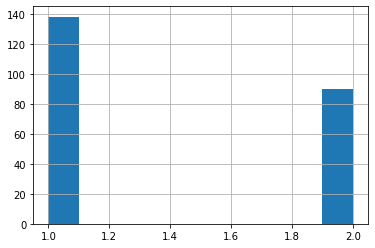

In [9]:
print (data["sex"].hist())

## Kaplan-Meier Estimator
- A non-parametric statistic used to estimate the survival function from lifetime data. - It is often used to measure the fraction of patients living for a certain amount of time after treatment.
    - S(ti) = S(ti-1)*(1-di/ni)
    - S(ti-1) = probability of being alive at ti-1
    - ni = #patients alive just before ti
    - di = #events at ti
    - t0=0; S(0)=1

In [7]:
# Create a KM object, then organize data :

kmf = KaplanMeierFitter() 

# If status = 1 , then dead = 0
# If status = 2 , then dead = 1

data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1

data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [10]:
# fit data into KM object. The event of interest is death (the "dead" column.)
# 1st arg: array or pd.Series of individual survival times
# 2nd arg: array or pd.Series that indicates if the event occured.

kmf.fit(durations =  data["time"], event_observed = data["dead"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

## Event Tables
- (1) Event_at: It stores the value of the timeline for our dataset, i.e., when was the patient observed in our experiment or when was the experiment conducted. 
    - In this case - it stores the value of survival days for a patient.
- (2) At_risk: The number of current patients. At the start, it will be the total number of patients we will observe in our experiment. 
    - If at a certain time, new patients are added, then we have to increase its value accordingly. Basically, we can say that: at_risk = current patients at_risk + entrance — removed
- (3) Entrance: It stores the value of new patients in a given timeline. It’s possible that while we have other patients, some new patients are also diagnosed. That’s why we add it here.
- (4) Censored: the goal is to find the survival probability for a patient. If at a specific timeline a person under experiment is alive, then that person goes into the censored category. If we don’t have information about when a patient died, then we add it to the censored data. Other possibilities are if a patient chooses to shift to another town where the experiment can’t be conducted, then we add that patient into the censored category.
- (5) Observed: The number of patients that died during the experiment.
- (6) Removed: The values of patients that are no longer part of our experiment. If a person died or is censored, then they fall into this category.

In [11]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [13]:
# Hand-calculating survival probability:
event_at_0 = kmf.event_table.iloc[0,:]
surv_for_0 = (event_at_0.at_risk - event_at_0.observed)/event_at_0.at_risk
surv_for_0

1.0

In [14]:
event_at_5 = kmf.event_table.iloc[1,:]
surv_for_5 = (event_at_5.at_risk - event_at_5.observed)/event_at_5.at_risk
surv_for_5

0.9956140350877193

In [15]:
event_at_11 = kmf.event_table.iloc[2,:]
surv_for_11 = (event_at_11.at_risk - event_at_11.observed)/event_at_11.at_risk
surv_for_11

0.986784140969163

In [16]:
surv_after_5  = surv_for_0 * surv_for_5
surv_after_11 = surv_for_0 * surv_for_5 * surv_for_11

print (surv_after_5)
print (surv_after_11)

0.9956140350877193
0.9824561403508771


In [17]:
# The kmf object provides these calculations for us :
kmf.predict(11)

0.9824561403508766

In [18]:
kmf.predict([0,5,11,12])

0     1.000000
5     0.995614
11    0.982456
12    0.978070
Name: KM_estimate, dtype: float64

In [19]:
# To get full list :
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
5.0,0.995614
11.0,0.982456
12.0,0.978070
13.0,0.969298
...,...
840.0,0.067127
883.0,0.050346
965.0,0.050346


In [20]:
# The number of days where on average 50% of patients have died.
kmf.median_survival_time_

310.0

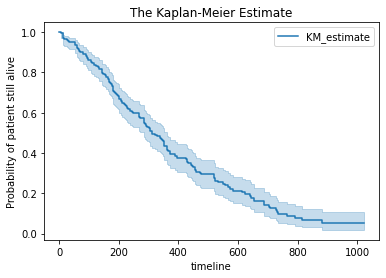

In [21]:
kmf.plot()
plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Probability of patient still alive")
plt.show()

In [166]:
# above graph: light blue = survival confidence interval
kmf.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
5.0,0.969277,0.999381
11.0,0.953935,0.993379
12.0,0.948120,0.990813
13.0,0.936682,0.985244
...,...,...
840.0,0.030728,0.123060
883.0,0.017866,0.108662
965.0,0.017866,0.108662
1010.0,0.017866,0.108662


In [167]:
# Probabaility of die :
#p(1022) = p(0) +......+p(1022)

kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017544
12.0,0.021930
13.0,0.030702
...,...
840.0,0.932873
883.0,0.949654
965.0,0.949654


In [168]:
kmf.cumulative_density_.head()

,KM_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017544
12.0,0.021930
13.0,0.030702


In [169]:
kmf.cumulative_density_.tail()

,KM_estimate
timeline,
840.0,0.932873
883.0,0.949654
965.0,0.949654
1010.0,0.949654
1022.0,0.949654


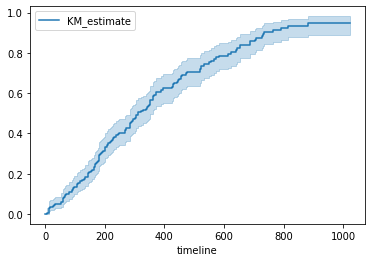

In [170]:
kmf.plot_cumulative_density()

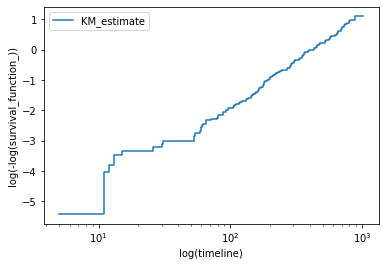

In [171]:
kmf.plot_loglogs()

## Hazard rates using Nelson-Aalen
- If we are curious about the hazard function h(t) of a population, we, unfortunately, can’t transform the Kaplan Meier estimate. For that, we use the Nelson-Aalen hazard function.

In [22]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(data["time"],event_observed = data["dead"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 228 total observations, 63 right-censored observations>

In [24]:
print(naf.cumulative_hazard_.head())
print(naf.cumulative_hazard_.tail())

          NA_estimate
timeline             
0.0          0.000000
5.0          0.004386
11.0         0.017660
12.0         0.022125
13.0         0.031114
          NA_estimate
timeline             
840.0        2.641565
883.0        2.891565
965.0        2.891565
1010.0       2.891565
1022.0       2.891565


<AxesSubplot:xlabel='timeline'>

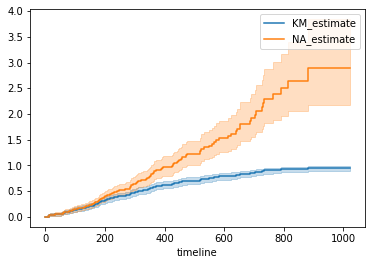

In [25]:
kmf.plot_cumulative_density()
naf.plot_cumulative_hazard()

<AxesSubplot:xlabel='timeline'>

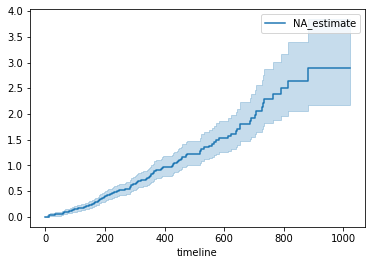

In [26]:
naf.plot()

In [27]:
# We can predict the value of a certain point :
naf.predict(1022)

2.8915648373471052